In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    roc_curve
)

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


In [2]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
# Update path according to your Drive location
df = pd.read_csv('/content/IMDB Dataset.csv')

df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
stop_words = stopwords.words('english')
stemmer = PorterStemmer()

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text.lower())
    words = text.split()
    return ' '.join(stemmer.stem(w) for w in words if w not in stop_words)

df['review'] = df['review'].astype(str).apply(preprocess_text)


KeyboardInterrupt: 

In [8]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})


In [9]:
X = df['review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
vectorizer = CountVectorizer(max_features=5000)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [11]:
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)


MultinomialNB()

In [12]:
y_pred = nb_model.predict(X_test_vec)
y_prob = nb_model.predict_proba(X_test_vec)[:, 1]


In [13]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8358


In [14]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.85      0.84      4961
           1       0.85      0.82      0.83      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [15]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[4212  749]
 [ 893 4146]]


In [16]:
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9065299532823576


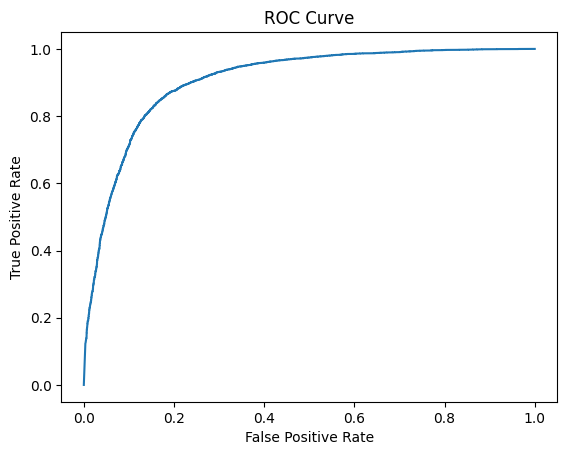

In [17]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


In [18]:
df = pd.read_csv('/content/breast_cancer.csv')
df.head()


,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,benign
1,1002945,5,4,4,5,7,10,3,2,1,benign
2,1015425,3,1,1,1,2,2,3,1,1,benign
3,1016277,6,8,8,1,3,4,3,7,1,benign
4,1017023,4,1,1,3,2,1,3,1,1,benign


In [19]:
df.describe()


,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [20]:
df.isnull().sum()


,0
Id,0
Cl.thickness,0
Cell.size,0
Cell.shape,0
Marg.adhesion,0
Epith.c.size,0
Bare.nuclei,0
Bl.cromatin,0
Normal.nucleoli,0
Mitoses,0


In [22]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())



In [25]:

X = df.drop(['Class', 'Id'], axis=1)
y = df['Class']




In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression(max_iter=1000)

rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_train, y_train)


RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5)

In [28]:
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['Cl.thickness', 'Cell.shape', 'Bare.nuclei', 'Bl.cromatin', 'Mitoses'], dtype='object')


In [29]:
ranking = pd.DataFrame({
    'Feature': X.columns,
    'Rank': rfe.ranking_
}).sort_values('Rank')

ranking


,Feature,Rank
0,Cl.thickness,1
2,Cell.shape,1
6,Bl.cromatin,1
5,Bare.nuclei,1
8,Mitoses,1
3,Marg.adhesion,2
7,Normal.nucleoli,3
4,Epith.c.size,4
1,Cell.size,5


In [30]:
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

model.fit(X_train_sel, y_train)
y_pred_sel = model.predict(X_test_sel)
y_prob_sel = model.predict_proba(X_test_sel)[:, 1]


In [32]:

y = df['Class'].map({2: 0, 4: 1})
print("Accuracy:", accuracy_score(y_test, y_pred_sel))
print("Precision:", precision_score(y_test, y_pred_sel))
print("Recall:", recall_score(y_test, y_pred_sel))
print("F1 Score:", f1_score(y_test, y_pred_sel))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_sel))


Accuracy: 0.9416058394160584


ValueError: pos_label=1 is not a valid label. It should be one of ['benign', 'malignant']

In [33]:
model.fit(X_train, y_train)
y_pred_all = model.predict(X_test)
y_prob_all = model.predict_proba(X_test)[:, 1]

print("All Features Accuracy:", accuracy_score(y_test, y_pred_all))
print("All Features ROC-AUC:", roc_auc_score(y_test, y_prob_all))


All Features Accuracy: 0.9562043795620438
All Features ROC-AUC: 0.9975993016150152


In [34]:
for n in [3, 7]:
    rfe = RFE(model, n_features_to_select=n)
    rfe.fit(X_train, y_train)

    features = X.columns[rfe.support_]

    model.fit(X_train[features], y_train)
    y_pred = model.predict(X_test[features])

    print(f"\nTop {n} Features:")
    print("Accuracy:", accuracy_score(y_test, y_pred))



Top 3 Features:
Accuracy: 0.9197080291970803

Top 7 Features:
Accuracy: 0.9562043795620438
